# 1. 주택구입부담지수와 설비투자비율
- 2011년 1분기부터 2021년 2분기까지
- 주택구입부담지수란, 중간소득가구가 표준대출을 받아 중간가격 주택을 구입하는 경우의 상환부담을 나타내는 지수로서, 지수가 낮을수록 주택구입부담이 완화됨을 의미
- 가설 : 주택구입부담지수와 설비투자비율은 반비례할 것이다.
- 주택구입부담지수 출처 : https://www.hf.go.kr/research/portal/theme/indexStatPage.do

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from matplotlib import font_manager, rcParams
!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumGothicCoding'
rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
idx = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/황희원/데이터/주택구입부담지수.csv')
idx

,자료시점,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,2011/1Q,63.9,127.0,65.2,49.5,70.7,35.9,56.3,43.3,NaN,78.5,30.8,36.5,38.1,37.4,27.0,28.3,50.3,40.8
1,2011/2Q,66.6,123.0,65.1,53.5,70.0,41.7,60.6,43.6,NaN,82.6,32.4,39.5,39.0,37.8,28.4,29.0,53.0,43.7
2,2011/3Q,65.7,117.8,65.2,53.9,66.9,41.9,61.7,44.4,NaN,80.3,34.7,41.6,39.4,38.4,28.9,28.7,52.5,44.0
3,2011/4Q,66.9,119.4,67.3,56.4,67.4,44.1,63.7,47.0,NaN,81.9,37.1,44.1,41.9,41.2,31.8,31.3,54.5,46.8
4,2012/1Q,62.3,110.8,62.6,53.7,62.7,41.4,59.3,45.1,NaN,76.2,36.2,42.5,40.2,40.0,30.3,30.2,50.7,47.2
5,2012/2Q,65.3,114.1,65.1,57.5,64.8,44.7,61.6,48.9,NaN,77.6,37.6,45.0,43.1,41.2,31.2,32.7,52.7,49.0
6,2012/3Q,59.4,104.8,60.4,54.0,59.1,41.6,55.4,45.4,NaN,69.8,34.5,41.6,40.8,38.3,28.6,30.9,48.7,46.9
7,2012/4Q,59.9,104.3,60.1,55.3,59.6,42.4,55.1,46.0,NaN,69.7,34.6,41.9,41.8,38.2,28.9,32.0,48.1,50.7
8,2013/1Q,53.7,94.8,53.8,50.4,51.9,38.4,49.9,40.7,NaN,61.8,34.0,39.2,36.9,35.8,27.5,30.1,44.8,45.1
9,2013/2Q,54.3,94.6,54.3,53.4,52.4,39.8,51.1,41.8,NaN,61.6,33.9,39.1,36.8,34.2,27.4,31.4,43.9,45.8


In [ ]:
idx2=idx.drop(index=[42])
idx2=idx2.iloc[:,0:2]
idx2

,자료시점,전국
0,2011/1Q,63.9
1,2011/2Q,66.6
2,2011/3Q,65.7
3,2011/4Q,66.9
4,2012/1Q,62.3
5,2012/2Q,65.3
6,2012/3Q,59.4
7,2012/4Q,59.9
8,2013/1Q,53.7
9,2013/2Q,54.3


In [ ]:
idx2.reset_index
idx2

,자료시점,전국
0,2011/1Q,63.9
1,2011/2Q,66.6
2,2011/3Q,65.7
3,2011/4Q,66.9
4,2012/1Q,62.3
5,2012/2Q,65.3
6,2012/3Q,59.4
7,2012/4Q,59.9
8,2013/1Q,53.7
9,2013/2Q,54.3


In [ ]:
idx2=idx2.iloc[:,1:]
idx2

,전국
0,63.9
1,66.6
2,65.7
3,66.9
4,62.3
5,65.3
6,59.4
7,59.9
8,53.7
9,54.3


In [ ]:
ivst=pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/가공완료/설비투자(전국).csv')
ivst

,시기,설비투자(%)
0,2010년 01분기,9.8
1,2010년 02분기,2.2
2,2010년 03분기,1.7
3,2010년 04분기,2.8
4,2011년 01분기,0.0
5,2011년 02분기,4.1
6,2011년 03분기,-1.6
7,2011년 04분기,-1.1
8,2012년 01분기,9.7
9,2012년 02분기,-7.3


In [ ]:
ivst2=ivst.iloc[4:,:]
ivst2

,시기,설비투자(%)
4,2011년 01분기,0.0
5,2011년 02분기,4.1
6,2011년 03분기,-1.6
7,2011년 04분기,-1.1
8,2012년 01분기,9.7
9,2012년 02분기,-7.3
10,2012년 03분기,-2.6
11,2012년 04분기,-2.6
12,2013년 01분기,-1.5
13,2013년 02분기,1.8


In [ ]:
ivst3=ivst2.reset_index(drop=True)
ivst3

,시기,설비투자(%)
0,2011년 01분기,0.0
1,2011년 02분기,4.1
2,2011년 03분기,-1.6
3,2011년 04분기,-1.1
4,2012년 01분기,9.7
5,2012년 02분기,-7.3
6,2012년 03분기,-2.6
7,2012년 04분기,-2.6
8,2013년 01분기,-1.5
9,2013년 02분기,1.8


In [ ]:
idx2.rename(columns={'전국':'주택구입부담지수'},inplace=True)
idx2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,주택구입부담지수
0,63.9
1,66.6
2,65.7
3,66.9
4,62.3
5,65.3
6,59.4
7,59.9
8,53.7
9,54.3


In [ ]:
final=pd.concat([ivst3,idx2],axis=1)
final

,시기,설비투자(%),주택구입부담지수
0,2011년 01분기,0.0,63.9
1,2011년 02분기,4.1,66.6
2,2011년 03분기,-1.6,65.7
3,2011년 04분기,-1.1,66.9
4,2012년 01분기,9.7,62.3
5,2012년 02분기,-7.3,65.3
6,2012년 03분기,-2.6,59.4
7,2012년 04분기,-2.6,59.9
8,2013년 01분기,-1.5,53.7
9,2013년 02분기,1.8,54.3


In [ ]:
final = final.set_index('시기')
final

,설비투자(%),주택구입부담지수
시기,,
2011년 01분기,0.0,63.9
2011년 02분기,4.1,66.6
2011년 03분기,-1.6,65.7
2011년 04분기,-1.1,66.9
2012년 01분기,9.7,62.3
2012년 02분기,-7.3,65.3
2012년 03분기,-2.6,59.4
2012년 04분기,-2.6,59.9
2013년 01분기,-1.5,53.7


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

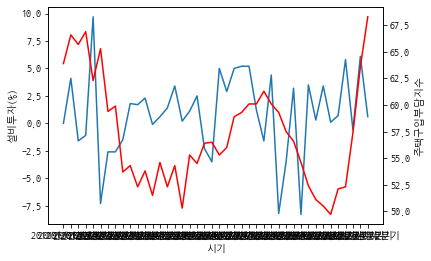

In [ ]:
sns.lineplot( data=final, x='시기', y='설비투자(%)')
ax = plt.gca()
ax2 = ax.twinx()
sns.lineplot( data=final, x='시기', y='주택구입부담지수', ax=ax2, color='red')


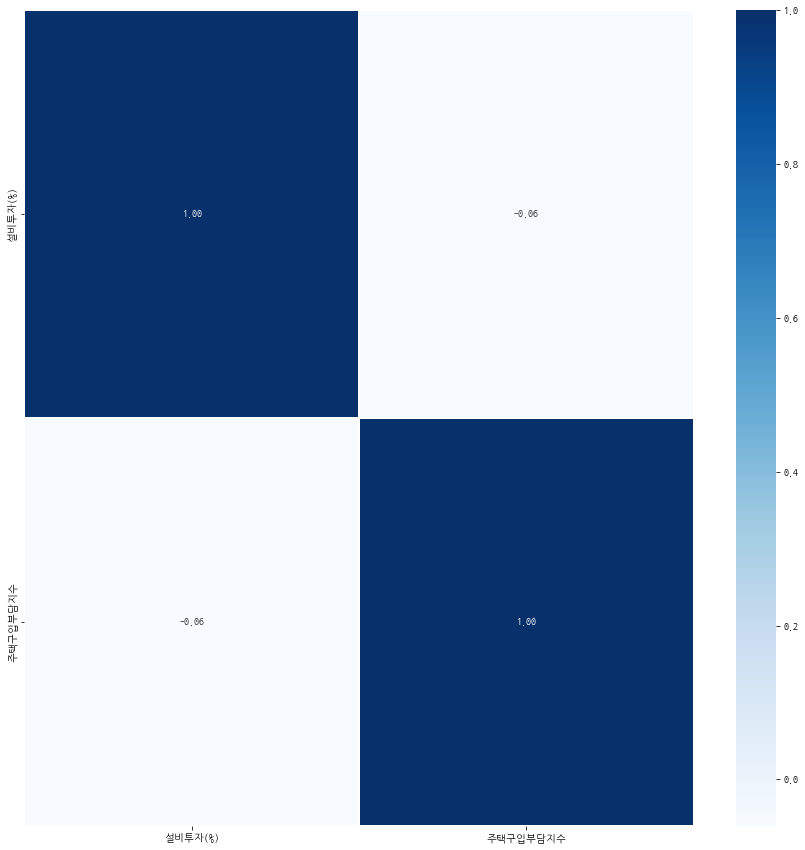

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = final.corr(), annot=True,
fmt = '.2f', linewidths=.5, cmap='Blues')

결론
- 딱히 연관관계는 보이지 않는듯함.
- 설비 투자라는 것이 꼭 건설업만을 뜻하는 것은 아니므로 다양한 변수가 존재할 가능성이 있기 때문에 관계가 없어보임.
- 하지만 설비라는 업종 특성상 결과는 설비 투자가 진행된 이후에 나올 가능성이 있음.
- 그래프를 확인해보면, 설비 투자가 최고점을 찍고 난 이후에 주택구입부담지수도 하위값으로 다다르는 것을 보면, 어느 정도의 연관성은 있을 수 있다고 가정할 수 있음.
- 그러므로 건설업만을 다루는 설비 투자 데이터를 이용해 정확한 분석이 필요해 보임.
- 그러나 데이터가 부족하므로 이정도의 분석이 최대인듯.

# 2. 주택구입부담지수와 민간 소비
- 주택구입부담지수란, 중간소득가구가 표준대출을 받아 중간가격 주택을 구입하는 경우의 상환부담을 나타내는 지수로서, 지수가 낮을수록 주택구입부담이 완화됨을 의미
- 가설 : 주택구입부담지수와 민간소비는 반비례할 것 = 지수가 낮을수록 소비는 늘 것


In [ ]:
idx = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/황희원/데이터/주택구입부담지수.csv')
idx

,자료시점,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,2011/1Q,63.9,127.0,65.2,49.5,70.7,35.9,56.3,43.3,NaN,78.5,30.8,36.5,38.1,37.4,27.0,28.3,50.3,40.8
1,2011/2Q,66.6,123.0,65.1,53.5,70.0,41.7,60.6,43.6,NaN,82.6,32.4,39.5,39.0,37.8,28.4,29.0,53.0,43.7
2,2011/3Q,65.7,117.8,65.2,53.9,66.9,41.9,61.7,44.4,NaN,80.3,34.7,41.6,39.4,38.4,28.9,28.7,52.5,44.0
3,2011/4Q,66.9,119.4,67.3,56.4,67.4,44.1,63.7,47.0,NaN,81.9,37.1,44.1,41.9,41.2,31.8,31.3,54.5,46.8
4,2012/1Q,62.3,110.8,62.6,53.7,62.7,41.4,59.3,45.1,NaN,76.2,36.2,42.5,40.2,40.0,30.3,30.2,50.7,47.2
5,2012/2Q,65.3,114.1,65.1,57.5,64.8,44.7,61.6,48.9,NaN,77.6,37.6,45.0,43.1,41.2,31.2,32.7,52.7,49.0
6,2012/3Q,59.4,104.8,60.4,54.0,59.1,41.6,55.4,45.4,NaN,69.8,34.5,41.6,40.8,38.3,28.6,30.9,48.7,46.9
7,2012/4Q,59.9,104.3,60.1,55.3,59.6,42.4,55.1,46.0,NaN,69.7,34.6,41.9,41.8,38.2,28.9,32.0,48.1,50.7
8,2013/1Q,53.7,94.8,53.8,50.4,51.9,38.4,49.9,40.7,NaN,61.8,34.0,39.2,36.9,35.8,27.5,30.1,44.8,45.1
9,2013/2Q,54.3,94.6,54.3,53.4,52.4,39.8,51.1,41.8,NaN,61.6,33.9,39.1,36.8,34.2,27.4,31.4,43.9,45.8


In [ ]:
consume=pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/가공완료/민간소비(전국).csv')
consume

,시기,민간소비(%)
0,2010년 01분기,0.9
1,2010년 02분기,0.9
2,2010년 03분기,1.0
3,2010년 04분기,0.8
4,2011년 01분기,1.2
5,2011년 02분기,0.7
6,2011년 03분기,-0.2
7,2011년 04분기,0.2
8,2012년 01분기,0.6
9,2012년 02분기,0.3


In [ ]:
idx2=idx.drop(index=[42])
idx2=idx2.iloc[:,0:2]
idx2


,자료시점,전국
0,2011/1Q,63.9
1,2011/2Q,66.6
2,2011/3Q,65.7
3,2011/4Q,66.9
4,2012/1Q,62.3
5,2012/2Q,65.3
6,2012/3Q,59.4
7,2012/4Q,59.9
8,2013/1Q,53.7
9,2013/2Q,54.3


In [ ]:
idx2=idx2.iloc[:,1:]
idx2

,전국
0,63.9
1,66.6
2,65.7
3,66.9
4,62.3
5,65.3
6,59.4
7,59.9
8,53.7
9,54.3


In [ ]:
idx2.rename(columns={'전국':'주택구입부담지수'},inplace=True)
idx2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,주택구입부담지수
0,63.9
1,66.6
2,65.7
3,66.9
4,62.3
5,65.3
6,59.4
7,59.9
8,53.7
9,54.3


In [ ]:
consume2=consume.iloc[:,0:2]
consume2


,시기,민간소비(%)
0,2010년 01분기,0.9
1,2010년 02분기,0.9
2,2010년 03분기,1.0
3,2010년 04분기,0.8
4,2011년 01분기,1.2
5,2011년 02분기,0.7
6,2011년 03분기,-0.2
7,2011년 04분기,0.2
8,2012년 01분기,0.6
9,2012년 02분기,0.3


In [ ]:
consume2=consume2.iloc[4:,:]
consume2

,시기,민간소비(%)
4,2011년 01분기,1.2
5,2011년 02분기,0.7
6,2011년 03분기,-0.2
7,2011년 04분기,0.2
8,2012년 01분기,0.6
9,2012년 02분기,0.3
10,2012년 03분기,1.0
11,2012년 04분기,0.3
12,2013년 01분기,-0.3
13,2013년 02분기,0.9


In [ ]:
consume3=consume2.reset_index(drop=True)
consume3

,시기,민간소비(%)
0,2011년 01분기,1.2
1,2011년 02분기,0.7
2,2011년 03분기,-0.2
3,2011년 04분기,0.2
4,2012년 01분기,0.6
5,2012년 02분기,0.3
6,2012년 03분기,1.0
7,2012년 04분기,0.3
8,2013년 01분기,-0.3
9,2013년 02분기,0.9


In [ ]:
final=pd.concat([consume3,idx2],axis=1)
final

,시기,민간소비(%),주택구입부담지수
0,2011년 01분기,1.2,63.9
1,2011년 02분기,0.7,66.6
2,2011년 03분기,-0.2,65.7
3,2011년 04분기,0.2,66.9
4,2012년 01분기,0.6,62.3
5,2012년 02분기,0.3,65.3
6,2012년 03분기,1.0,59.4
7,2012년 04분기,0.3,59.9
8,2013년 01분기,-0.3,53.7
9,2013년 02분기,0.9,54.3


In [ ]:
final = final.set_index('시기')
final

,민간소비(%),주택구입부담지수
시기,,
2011년 01분기,1.2,63.9
2011년 02분기,0.7,66.6
2011년 03분기,-0.2,65.7
2011년 04분기,0.2,66.9
2012년 01분기,0.6,62.3
2012년 02분기,0.3,65.3
2012년 03분기,1.0,59.4
2012년 04분기,0.3,59.9
2013년 01분기,-0.3,53.7


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

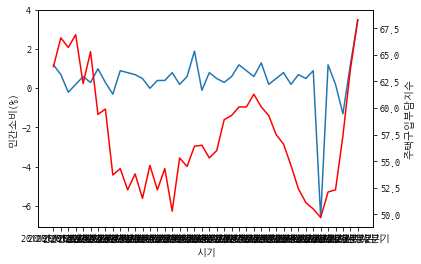

In [ ]:
sns.lineplot( data=final, x='시기', y='민간소비(%)')
ax = plt.gca()
ax2 = ax.twinx()
sns.lineplot( data=final, x='시기', y='주택구입부담지수', ax=ax2, color='red')

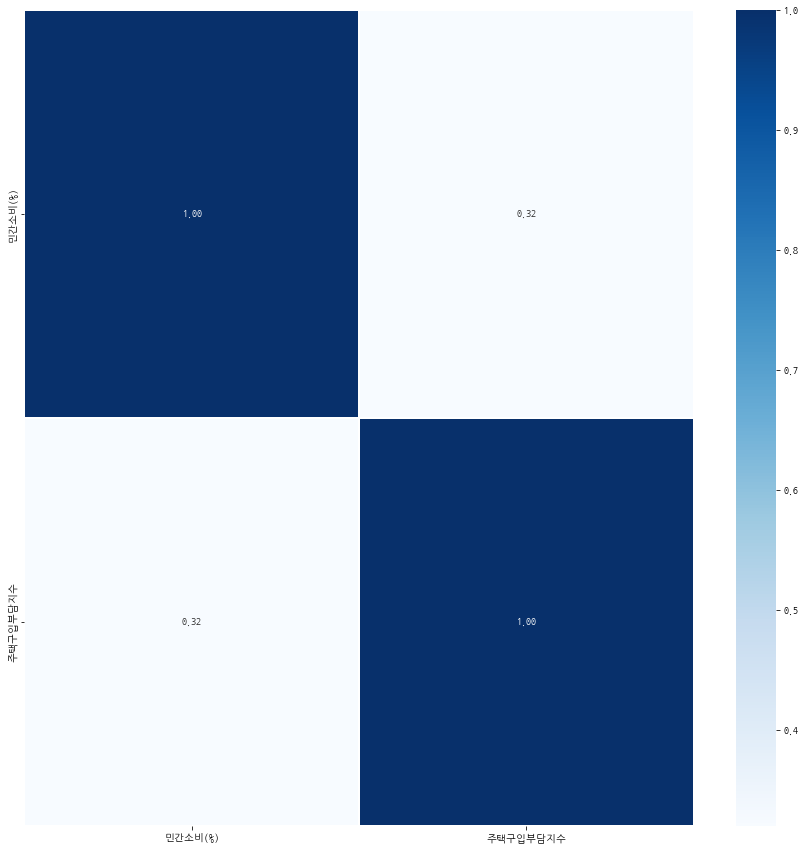

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = final.corr(), annot=True,
fmt = '.2f', linewidths=.5, cmap='Blues')

결론
- 생각보다 높은 양의 상관관계를 갖고 있음. 상관계수 0.32
- 주택구입부담지수와 민간소비와 반비례일 것이라는 가설은 기각되었지만 상관관계는 존재함
- 소비가 줄면 주택 구입도 부담스러워하는 경향이 있음.